# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# to install the citipy library
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=dff712b7927913d0ca9c67b0d98ca01bfac2e1615b8feb740a3b97844b907bf9
  Stored in directory: c:\users\223005380\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#cities = ["Paris", "London","Oslo","Behijing","Mexico City"]#this line was added just for testing purposes while I was coding

url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1

city_found = []    
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
min_temp = []
max_temp = []
wind_speed = []

for city in cities:
    try:
        endpoint = f"{url}appid={weather_api_key}&q={city}&units=imperial"
        #print (endpoint)
        response = requests.get(endpoint).json()
         
        city_found.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        min_temp.append(response["main"]["temp_min"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}")
        count = count + 1
        
    except:
        print(f"{city} city not found. Skipping...")


saryshagan city not found. Skipping...
Processing Record 1 | belaya gora
Processing Record 2 | luwuk
Processing Record 3 | vaini
Processing Record 4 | huanren
Processing Record 5 | gat
Processing Record 6 | tateyama
grand centre city not found. Skipping...
Processing Record 7 | avarua
Processing Record 8 | nanakuli
Processing Record 9 | busselton
taolanaro city not found. Skipping...
Processing Record 10 | erdenet
rungata city not found. Skipping...
Processing Record 11 | wamba
Processing Record 12 | mar del plata
Processing Record 13 | dhidhdhoo
tidore city not found. Skipping...
Processing Record 14 | portland
Processing Record 15 | havre-saint-pierre
Processing Record 16 | puerto ayora
Processing Record 17 | hobart
Processing Record 18 | arraial do cabo
Processing Record 19 | hermanus
Processing Record 20 | klyuchi
Processing Record 21 | berlevag
Processing Record 22 | bredasdorp
Processing Record 23 | klaksvik
Processing Record 24 | tonaya
Processing Record 25 | jishou
Processing R

Processing Record 222 | igarka
Processing Record 223 | lebu
Processing Record 224 | hokitika
Processing Record 225 | vanavara
opobo city not found. Skipping...
Processing Record 226 | airai
Processing Record 227 | skibbereen
Processing Record 228 | natal
Processing Record 229 | acapulco
Processing Record 230 | kualakapuas
Processing Record 231 | half moon bay
Processing Record 232 | codrington
Processing Record 233 | horsham
cockburn harbour city not found. Skipping...
Processing Record 234 | kruisfontein
Processing Record 235 | chapais
Processing Record 236 | tres lagoas
Processing Record 237 | mitsamiouli
Processing Record 238 | belz
mogochin city not found. Skipping...
Processing Record 239 | rivadavia
Processing Record 240 | bouna
Processing Record 241 | katobu
Processing Record 242 | barranca
Processing Record 243 | ayan
Processing Record 244 | aklavik
Processing Record 245 | ahipara
Processing Record 246 | sola
Processing Record 247 | salinopolis
Processing Record 248 | washingto

Processing Record 447 | turbat
Processing Record 448 | sabha
Processing Record 449 | severo-kurilsk
ust-kamchatsk city not found. Skipping...
Processing Record 450 | mason city
Processing Record 451 | touros
Processing Record 452 | lar
Processing Record 453 | dukat
Processing Record 454 | lompoc
Processing Record 455 | phonhong
higuey city not found. Skipping...
Processing Record 456 | lahaina
Processing Record 457 | ewa beach
Processing Record 458 | sarankhola
Processing Record 459 | broken hill
Processing Record 460 | xacmaz
Processing Record 461 | manokwari
Processing Record 462 | upernavik
Processing Record 463 | izumo
Processing Record 464 | maningrida
pousat city not found. Skipping...
Processing Record 465 | egvekinot
lolua city not found. Skipping...
Processing Record 466 | svetlyy
Processing Record 467 | ancud
Processing Record 468 | san patricio
Processing Record 469 | eydhafushi
manzil tamim city not found. Skipping...
louisbourg city not found. Skipping...
Processing Record

In [4]:
len(city_found)

556

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Display the DataFrame
callresults_df = pd.DataFrame({
    "City": city_found,
    "Cloudiness": cloudy,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Min Temp": min_temp,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
callresults_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Min Temp,Max Temp,Wind Speed
0,Belaya Gora,33,RU,1603459267,92,68.53,146.42,5.07,5.07,5.07,3.67
1,Luwuk,16,ID,1603459267,78,-0.95,122.79,78.93,78.93,78.93,0.47
2,Vaini,75,TO,1603459267,88,-21.20,-175.20,71.60,71.60,71.60,8.05
3,Huanren,0,CN,1603459267,88,41.26,125.37,31.23,31.23,31.23,2.71
4,Kiryat Gat,0,IL,1603458998,74,31.61,34.76,83.66,82.00,84.99,13.29
...,...,...,...,...,...,...,...,...,...,...,...
551,Oytal,100,KZ,1603459428,67,42.91,73.27,42.48,42.48,42.48,9.35
552,Sabana Grande de Boyá,40,DO,1603459428,94,18.95,-69.79,82.38,80.60,84.20,7.72
553,Angoche,0,MZ,1603459428,63,-16.23,39.91,81.23,81.23,81.23,14.38
554,Auki,100,SB,1603459429,83,-8.77,160.70,78.10,78.10,78.10,5.14


In [6]:
callresults_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Temp          556
Min Temp      556
Max Temp      556
Wind Speed    556
dtype: int64

In [7]:
#Export the city data into a .csv.
callresults_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

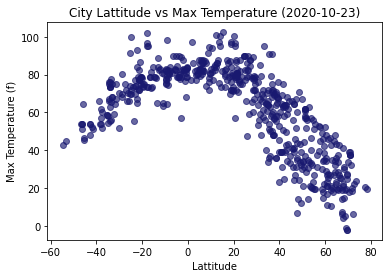

In [10]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
from datetime import date
plt.scatter(lat, max_temp, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Max Temperature ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/fig1.png")
plt.show()

##### The above scatter plot analizes the relationship between the lattitude and the Maximum Temperature from the ramdom cities selected

#### Latitude vs. Humidity Plot

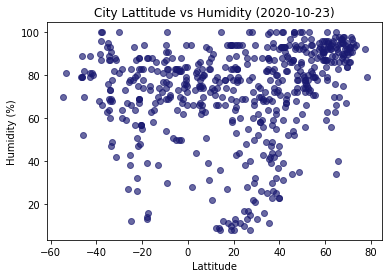

In [11]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, humidity, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Humidity ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2.png")
plt.show()

##### The above scatter plot analizes the relationship between the lattitude and the Humidity from the ramdom cities selected

#### Latitude vs. Cloudiness Plot

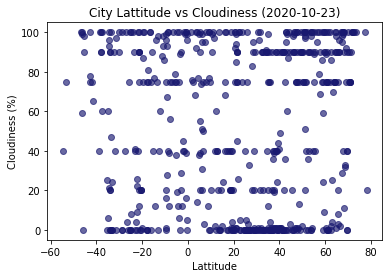

In [13]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, cloudy, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Cloudiness ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3.png")
plt.show()

##### The above scatter plot analizes the relationship between the lattitude and the Cloudiness from the ramdom cities selected

#### Latitude vs. Wind Speed Plot

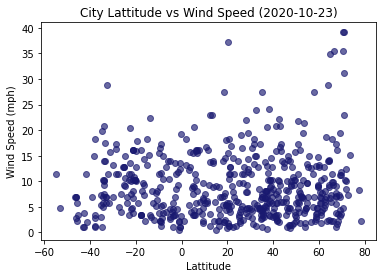

In [14]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, wind_speed, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
#plt.plot(Capomulin_weight, regress_values,"r-")
#plt.annotate(line_eq,(17,25.47214326),fontsize=15,color="red")
plt.title(f"City Lattitude vs Wind Speed ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig4.png")
plt.show()

##### The above scatter plot analizes the relationship between the lattitude and the Wind Speed from the ramdom cities selected

## Linear Regression

In [16]:
# Create Northern Hemisphere DataFrames
northern_df = callresults_df.loc[(callresults_df["Lat"]>0)]
northern_df.to_csv("output_data/northern.csv", index=False, header=True)
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Min Temp,Max Temp,Wind Speed
0,Belaya Gora,33,RU,1603459267,92,68.53,146.42,5.07,5.07,5.07,3.67
3,Huanren,0,CN,1603459267,88,41.26,125.37,31.23,31.23,31.23,2.71
4,Kiryat Gat,0,IL,1603458998,74,31.61,34.76,83.66,82.00,84.99,13.29
5,Tateyama,12,JP,1603459268,88,34.98,139.87,64.00,64.00,64.00,1.01
7,Nānākuli,90,US,1603459269,78,21.39,-158.15,76.80,71.60,80.60,11.41
...,...,...,...,...,...,...,...,...,...,...,...
549,Alginet,0,ES,1603459427,44,39.27,-0.47,74.35,73.00,75.99,8.99
550,Thessalon,90,CA,1603459428,100,46.25,-83.57,39.20,39.20,39.20,4.70
551,Oytal,100,KZ,1603459428,67,42.91,73.27,42.48,42.48,42.48,9.35
552,Sabana Grande de Boyá,40,DO,1603459428,94,18.95,-69.79,82.38,80.60,84.20,7.72


In [17]:
# Create Southern Hemisphere DataFrames
southern_df = callresults_df.loc[(callresults_df["Lat"]<0)]
southern_df.to_csv("output_data/southern.csv", index=False, header=True)
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Min Temp,Max Temp,Wind Speed
1,Luwuk,16,ID,1603459267,78,-0.95,122.79,78.93,78.93,78.93,0.47
2,Vaini,75,TO,1603459267,88,-21.20,-175.20,71.60,71.60,71.60,8.05
6,Avarua,100,CK,1603459268,88,-21.21,-159.78,71.60,71.60,71.60,10.29
8,Busselton,0,AU,1603459269,47,-33.65,115.33,55.18,54.00,55.99,13.91
11,Mar del Plata,90,AR,1603458650,100,-38.00,-57.56,56.05,55.00,57.20,3.36
...,...,...,...,...,...,...,...,...,...,...,...
542,Kilindoni,56,TZ,1603459426,71,-7.91,39.67,81.90,81.90,81.90,10.49
544,Maketu,60,NZ,1603459426,100,-37.77,176.45,59.25,57.99,60.01,1.01
545,Cuenca,20,EC,1603459423,82,-2.88,-78.98,57.20,57.20,57.20,3.36
553,Angoche,0,MZ,1603459428,63,-16.23,39.91,81.23,81.23,81.23,14.38


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is: y = -1.09x + 98.5
The correlation coefficient is -0.86
The r-squared (goodness of fit) is: 0.7375032472232916
The pvalue of the model is: 6.592315130260602e-116


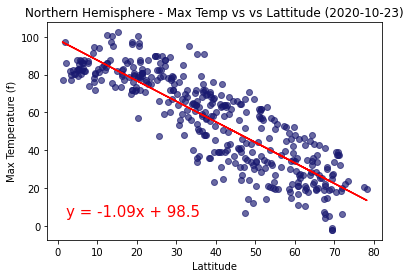

In [19]:
x = northern_df["Lat"]
y = northern_df["Max Temp"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/northern_fig1.png")
plt.show()

###### We can appreciatte de following from the Northen Hemisphere regression between Max Temp and Lattitued:
 * Based on the sign of the correlation coefficiente, there is a negative correlation between the lattitude and the Max temperature, this means that as the Lattitude Increases the Temperature decreases
 * The goodness of fit of the model is very strong, this suggests that the model would be good in general (Ceteris Paribus) to predict the Temperature using the Lattitude a as predictor
 * Finally, the model has statistical significance, since the p_value is lower tha alpha= 0.05

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is: y = 0.63x + 86.52
The correlation coefficient is 0.72
The r-squared (goodness of fit) is: 0.5113590897725836
The pvalue of the model is: 1.1521232216483386e-26


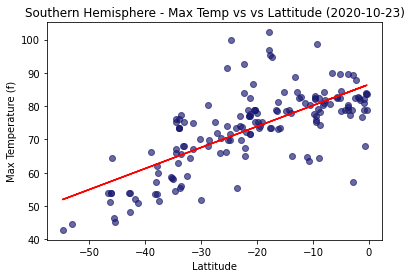

In [21]:
x = southern_df["Lat"]
y = southern_df["Max Temp"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/southern_fig1.png")
plt.show()

###### We can appreciatte de following from the Southern Hemisphere regression between Max Temp and Lattitued:
 * Based on the sign of the correlation coefficiente, there is a positive correlation between the lattitude and the Max temperature, this means that as the Lattitude Increases the Temperature increases
 * The goodness of fit of the model is relatively good, this suggests that the model would be good in general (Ceteris Paribus) to predict the Temperature using the Lattitude a as predictor
 * Finally, the model has statistical significance, since the p_value is lower tha alpha= 0.05

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.44x + 55.38
The correlation coefficient is 0.37
The r-squared (goodness of fit) is: 0.13762388213063567
The pvalue of the model is: 2.6642641916790227e-14


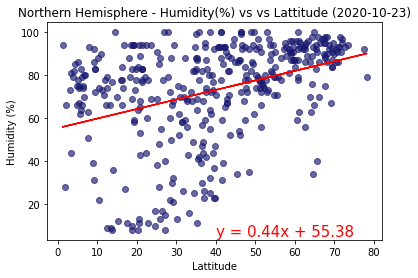

In [24]:
x = northern_df["Lat"]
y = northern_df["Humidity"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/northern_fig2.png")
plt.show()

###### We can appreciatte de following from the Northen Hemisphere regression between Humidity and Lattitude:
 * Based on the sign of the correlation coefficiente, there is a positive correlation between the lattitude and the Humidity, this means that as the Lattitude Increases the Humidity increases
 * The goodness of fit of the model is relatively good, this suggests that the model would be good in general (Ceteris Paribus) to predict the Humidity using the Lattitude a as predictor
 * Finally, the model has statistical significance, since the p_value is lower tha alpha= 0.05

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is: y = -0.08x + 70.32
The correlation coefficient is -0.06
The r-squared (goodness of fit) is: 0.0033137675318030075
The pvalue of the model is: 0.4668480031644926


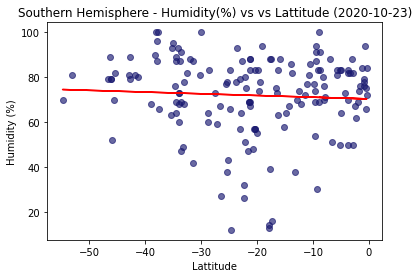

In [25]:
x = southern_df["Lat"]
y = southern_df["Humidity"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/southern_fig2.png")
plt.show()

###### We can appreciatte de following from the Southern Hemisphere regression between Humidity and Lattitude:
 * Based on the sign of the correlation coefficiente, there is a negative correlation between the lattitude and the Humidity, this means that as the Lattitude Increases the Humidity decreases
 * The goodness of fit of the model is very weak, this suggests that probably we must add some other variables to predict in an effective way the Humidity 
 * Finally, the model does not have statistical significance, since the p_value is greater than alpha= 0.05

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.38x + 36.74
The correlation coefficient is 0.18
The r-squared (goodness of fit) is: 0.03315717657933748
The pvalue of the model is: 0.00027977311437548904


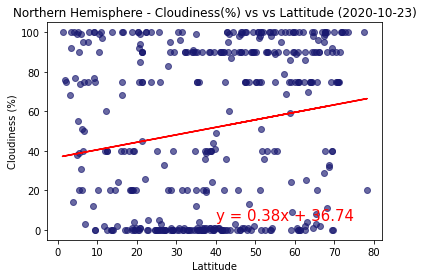

In [26]:
x = northern_df["Lat"]
y = northern_df["Cloudiness"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/northern_fig3.png")
plt.show()

###### We can appreciatte de following from the Northen Hemisphere regression between Cloudiness and Lattitude:
 * Based on the sign of the correlation coefficiente, there is a positive correlation between the lattitude and the Cloudiness, this means that as the Lattitude Increases the Cloudiness increases
 * The goodness of fit of the model is very weak, this is, the portion of the variance of the Cloudiness explained by the variance of the Lattitude is minimum. This suggests that probably we must add some other variables to predict in an effective way the Cloudiness 
 * Finally, the model has statistical significance, since the p_value is lower than alpha= 0.05

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is: y = -0.1x + 52.79
The correlation coefficient is -0.03
The r-squared (goodness of fit) is: 0.001192876012087217
The pvalue of the model is: 0.6626019567980034


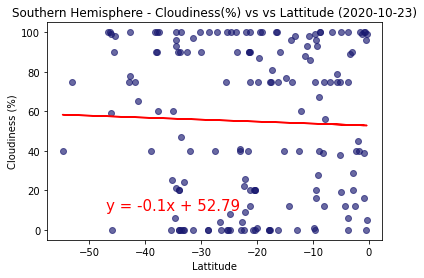

In [27]:
x = southern_df["Lat"]
y = southern_df["Cloudiness"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-47,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/southern_fig3.png")
plt.show()

###### We can appreciatte de following from the Southern Hemisphere regression between Cloudiness and Lattitude:
 * Based on the sign of the correlation coefficient, there is a negative correlation between the lattitude and the Cloudiness, this means that as the Lattitude Increases the Cloudiness decreases
 * The goodness of fit of the model is very weak, this is, the portion of the variance of the Cloudiness explained by the variance of the Lattitude is minimum. This suggests that probably we must add some other variables to predict in an effective way the Cloudiness 
 * Finally, the model does not have statistical significance, since the p_value is greater than alpha= 0.05

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is: y = 0.02x + 8.01
The correlation coefficient is 0.07
The r-squared (goodness of fit) is: 0.005058398672291043
The pvalue of the model is: 0.15882357811977404


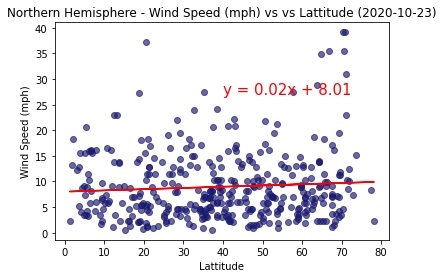

In [28]:
x = northern_df["Lat"]
y = northern_df["Wind Speed"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/northern_fig4.png")
plt.show()

###### We can appreciatte de following from the Northen Hemisphere regression between Wind Speed and Lattitude:
 * Based on the sign of the correlation coefficient, there is a positive correlation between the lattitude and the Wind Speed, this means that as the Lattitude Increases the Wind Speed increases. It is worth to say that the slope is not very steep.
 * The goodness of fit of the model is very weak, this is, the portion of the variance of the Wind Speed explained by the variance of the Lattitude is minimum. This suggests that probably we must add some other variables to predict in an effective way the Cloudiness 
 * Finally, the model does not have statistical significance, since the p_value is greater than alpha= 0.05

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is: y = -0.02x + 8.19
The correlation coefficient is -0.05
The r-squared (goodness of fit) is: 0.0022703377066588004
The pvalue of the model is: 0.5471030752754017


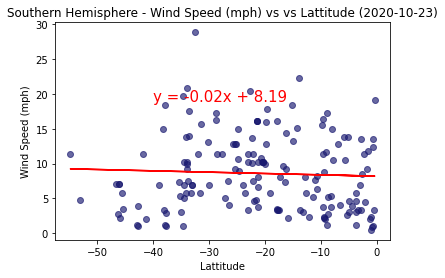

In [29]:
x = southern_df["Lat"]
y = southern_df["Wind Speed"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")
print(f"The pvalue of the model is: {pvalue}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-40,19),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/southern_fig4.png")
plt.show()

###### We can appreciatte de following from the Southern Hemisphere regression between Wind Speed and Lattitude:
 * Based on the sign of the correlation coefficient, there is a negative correlation between the lattitude and the Wind Speed, this means that as the Lattitude Increases the Wind Speed decreases. It is worth to say that the slope is not very steep.
 * The goodness of fit of the model is very weak, this is, the portion of the variance of the Wind Speed explained by the variance of the Lattitude is minimum. This suggests that probably we must add some other variables to predict in an effective way the Cloudiness 
 * Finally, the model does not have statistical significance, since the p_value is greater than alpha= 0.05